<a href="https://colab.research.google.com/github/amarathe/ELEN521_labs/blob/master/project_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Retinal OCT Images recognition
# Sharanjeet Singh, Ashwin Marathe
Classify images of retina
4 categories: 
    CNV - Choroidal neovascularization
    DME -  Diabetic macular edema 
    DRUSEN - Multiple drusen
    NORMAL - Normal retina

84,000 images in dataset
    
https://www.kaggle.com/paultimothymooney/kermany2018/data#CNV-1016042-2.jpeg

In [0]:
from keras.layers import *
from keras.models import Model
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import Image
import pandas as pd
import os.path
from os import path
import glob, os
import random

BATCHSIZE = 64
NSAMPLES = 10000

#Instructions for getting dataset from kaggle:
# https://medium.com/@saedhussain/google-colaboratory-and-kaggle-datasets-b57a83eb6ef8
from google.colab import files
!pip install -q kaggle
#Upload your kaggle.json API file

if not path.exists("/root/.kaggle/kaggle.json"): 
  firsttime = True
  uploaded = files.upload()
  !mkdir ~/.kaggle
  !mv kaggle.json ~/.kaggle/kaggle.json
  !ls -halt ~/.kaggle
  !chmod 600 ~/.kaggle/kaggle.json


!kaggle datasets download -d paultimothymooney/kermany2018






Using TensorFlow backend.


Saving kaggle.json to kaggle.json
total 16K
drwxr-xr-x 2 root root 4.0K Mar  1 03:19 .
drwx------ 1 root root 4.0K Mar  1 03:19 ..
-rw-r--r-- 1 root root   64 Mar  1 03:19 kaggle.json
100% 10.8G/10.8G [04:22<00:00, 77.0MB/s]
100% 10.8G/10.8G [04:22<00:00, 44.3MB/s]


In [0]:
%matplotlib inline


import zipfile
if not path.exists("kermany2018"):
  with zipfile.ZipFile("kermany2018.zip","r") as zip_ref:
    zip_ref.extractall("kermany2018")

#!ls kermany2018/OCT2017\ /train/CNV/ | more
#If first time, partition 5% validation data from training data
if firsttime:
  os.system("mv kermany2018/OCT2017\ /val/ kermany2018/OCT2017\ /backup_val/" )
  os.system("mkdir kermany2018/OCT2017\ /val")
  for label in ["CNV", "DME", "DRUSEN", "NORMAL"]:
    files = list(glob.glob("kermany2018/OCT2017 /train/" + label + "/*.jpeg"))
    random.shuffle(files)
    #print ("glob:", glob.glob("kermany2018/OCT2017 /train/" + label + "/*.jpeg"))
    #print ("files:", files)
    train_files, val_files = files[:int(len(files)*0.95)], files[int(len(files)*0.95):]
    os.system("mkdir kermany2018/OCT2017\ /val/"+label+"/")
    for file in val_files:
      #print ("Moving file:", file, "to: kermany2018/OCT2017\ /val/" + label + "/")
      os.system("mv " + file.replace(" ", "\ ") + " kermany2018/OCT2017\ /val/" + label + "/")
  firsttime = False

#!ls "kermany2018/OCT2017 "
train_datagen = ImageDataGenerator(rescale=1./256)
#valid_datagen = ImageDataGenerator(rescale=1./256)
test_datagen = ImageDataGenerator(rescale=1./256)




Found 79308 images belonging to 4 classes.
Found 4176 images belonging to 4 classes.
Found 968 images belonging to 4 classes.


In [0]:
# load and iterate training dataset
train_generator = train_datagen.flow_from_directory('kermany2018/OCT2017 /train/', class_mode='categorical', 
                                             target_size=(512,512), batch_size=BATCHSIZE)

#Only 32 images in validation dataset - too small. Use test train split from train dataset
# load and iterate validation dataset
#valid_generator = valid_datagen.flow_from_directory('kermany2018/OCT2017 /val/', class_mode='categorical', 
#                                           target_size=(512,512), batch_size=BATCHSIZE)
valid_generator = train_datagen.flow_from_directory('kermany2018/OCT2017 /val/', class_mode='categorical', 
                                             target_size=(512,512), batch_size=BATCHSIZE)
# load and iterate test dataset
test_generator = test_datagen.flow_from_directory('kermany2018/OCT2017 /test/', class_mode='categorical', 
                                           target_size=(512,512), batch_size=BATCHSIZE)

#traindf = pd.read_csv('kermany2018.zip')

Found 75341 images belonging to 4 classes.
Found 8143 images belonging to 4 classes.
Found 968 images belonging to 4 classes.


In [0]:
!ls kermany2018/OCT2017\ /val/NORMAL/ | wc -l
!ls kermany2018/OCT2017\ /train/NORMAL/ | wc -l


2566
23749


In [0]:
#for label in ["CNV", "DME", "DRUSEN", "NORMAL"]:

#  files = list(glob.glob("kermany2018/OCT2017 /train/" + label + "/*.jpeg"))
#  random.shuffle(files)
#  #print ("glob:", glob.glob("kermany2018/OCT2017 /train/" + label + "/*.jpeg"))
#  #print ("files:", files)
#  train_files, val_files = files[:int(len(files)*0.95)], files[int(len(files)*0.95):]
#  os.system("mkdir kermany2018/OCT2017\ /val/"+label+"/")
#  for file in val_files:
#    print ("Moving file:", file, "to: kermany2018/OCT2017\ /val/" + label + "/")
#    os.system("mv " + file.replace(" ", "\ ") + " kermany2018/OCT2017\ /val/" + label + "/")

Moving file: kermany2018/OCT2017 /train/CNV/CNV-7159021-115.jpeg to: kermany2018/OCT2017\ /val/CNV/
Moving file: kermany2018/OCT2017 /train/CNV/CNV-933576-77.jpeg to: kermany2018/OCT2017\ /val/CNV/
Moving file: kermany2018/OCT2017 /train/CNV/CNV-3453634-125.jpeg to: kermany2018/OCT2017\ /val/CNV/
Moving file: kermany2018/OCT2017 /train/CNV/CNV-6581164-198.jpeg to: kermany2018/OCT2017\ /val/CNV/
Moving file: kermany2018/OCT2017 /train/CNV/CNV-6741522-156.jpeg to: kermany2018/OCT2017\ /val/CNV/
Moving file: kermany2018/OCT2017 /train/CNV/CNV-4952759-23.jpeg to: kermany2018/OCT2017\ /val/CNV/
Moving file: kermany2018/OCT2017 /train/CNV/CNV-3318854-182.jpeg to: kermany2018/OCT2017\ /val/CNV/
Moving file: kermany2018/OCT2017 /train/CNV/CNV-3118383-55.jpeg to: kermany2018/OCT2017\ /val/CNV/
Moving file: kermany2018/OCT2017 /train/CNV/CNV-7565927-74.jpeg to: kermany2018/OCT2017\ /val/CNV/
Moving file: kermany2018/OCT2017 /train/CNV/CNV-1781140-92.jpeg to: kermany2018/OCT2017\ /val/CNV/
Moving

In [0]:
#Returns model and model before last activation (for debug)
def get_model():
    x = x_in = Input((512,512,3), name="input")
    x = Conv2D(8, (3,3), padding="same",  name="fe0")(x)
    x = Activation("relu", name="r0")(x)
    x = MaxPooling2D(2,2,name="mp0")(x)
    x = BatchNormalization(name="bn1")(x)
    x = Conv2D(16, (3,3), padding="same", name="fe1")(x)
    x = Activation("relu", name="r1")(x)
 #   x = MaxPooling2D(2,2,name="mp1")(x)
    x = BatchNormalization(name="bn2")(x)
    x = Conv2D(16, (3,3), padding="same", name="fe2")(x)
    x = Activation("relu", name="r2")(x)
    x = MaxPooling2D(2,2,name="mp2")(x)
    x = BatchNormalization(name="bn3")(x)
    x = Conv2D(32, (3,3), padding="same", name="fe3")(x)
    x = Activation("relu", name="r3")(x)
    x = BatchNormalization(name="bn4")(x)
    x = Conv2D(32, (3,3), padding="same", name="fe4")(x)
    x = Activation("relu", name="r4")(x)
    x = MaxPooling2D(2,2,name="mp3")(x)   
    x = Dropout(0.5, name="d0")(x)
    x = Flatten(name="fl")(x)
    #x = Dense(64, name="d0", activation="relu")(x)
    x = Dense(4, name="d1")(x)
    x = x_int = Activation("softmax", name="s1")(x)
    m = Model(inputs=x_in, outputs=x)
    m_int = Model(inputs=x_in, outputs=x_int)
    m.summary()
    return m, m_int


In [0]:
model, model_int = get_model()
adam = Adam(lr=0.001)
adam = Adam(lr=0.0001)
model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["acc"])

result = model.evaluate_generator(test_generator)
print ("Test results with random weights - should be 25%: Accuracy", result[1])
print ("\t Loss:", result[0])

NUM_EPOCHS = 20

history = model.fit_generator(
    train_generator,
    steps_per_epoch=NSAMPLES//BATCHSIZE, # number of times it executes until it declares epoch is over.
    epochs=NUM_EPOCHS,
    validation_data=valid_generator,
    validation_steps=NSAMPLES//(4*BATCHSIZE))

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 512, 512, 3)       0         
_________________________________________________________________
fe0 (Conv2D)                 (None, 512, 512, 8)       224       
_________________________________________________________________
r0 (Activation)              (None, 512, 512, 8)       0         
_________________________________________________________________
mp0 (MaxPooling2D)           (None, 256, 256, 8)       0         
_________________________________________________________________
bn1 (BatchNormalization)     (None, 256, 256, 8)       32        
_________________________________________________________________
fe1 (Conv2D)                 (None, 256, 256, 16)      1168      
_________________________________________________________________
r1 (Activation)              (None, 256, 256, 16)      0   

In [0]:
#for data_batch, labels_batch in train_generator:
#  prediction = model.predict(data_batch)
#  print ("Prediction:", prediction)
#  print ("labels:", labels_batch)
#  break

result = model.evaluate_generator(test_generator)
print ("Test results: Accuracy", result[1])
print ("\t Loss:", result[0])


Test results: Accuracy 0.6353305785123967
	 Loss: 0.9407266161658547


In [0]:
import matplotlib.pyplot as plt
def plothistory(history):
  # Plot training & validation accuracy values
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

# Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

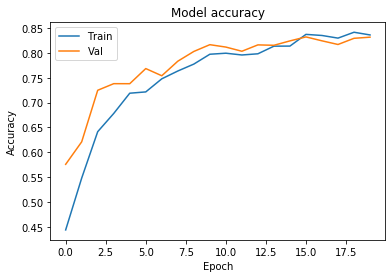

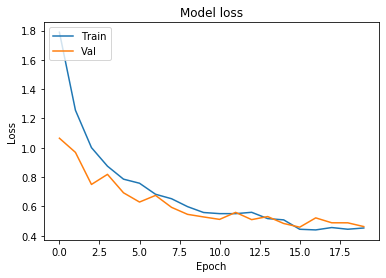

In [0]:
plothistory(history)

Use VGG16 and train last layer

In [0]:
# load and iterate training dataset
train_generator = train_datagen.flow_from_directory('kermany2018/OCT2017 /train/', class_mode='categorical', 
                                             target_size=(32,32), batch_size=BATCHSIZE)

#Only 32 images in validation dataset - too small. Use test train split from train dataset
# load and iterate validation dataset
#valid_generator = valid_datagen.flow_from_directory('kermany2018/OCT2017 /val/', class_mode='categorical', 
#                                           target_size=(512,512), batch_size=BATCHSIZE)
valid_generator = train_datagen.flow_from_directory('kermany2018/OCT2017 /val/', class_mode='categorical', 
                                             target_size=(32,32), batch_size=BATCHSIZE)
# load and iterate test dataset
test_generator = test_datagen.flow_from_directory('kermany2018/OCT2017 /test/', class_mode='categorical', 
                                           target_size=(32,32), batch_size=BATCHSIZE)

Found 75341 images belonging to 4 classes.
Found 8143 images belonging to 4 classes.
Found 968 images belonging to 4 classes.


In [0]:
from keras.applications import VGG16

vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))
vgg16.summary()

for layer in vgg16.layers[:-4]:
  layer.trainable=False

for layer in vgg16.layers:
  print (layer, layer.trainable)

#x_i = Input((150, 150, 3), name="input")
x_i = Input((32,32,3), name="input")
x = vgg16(x_i)
x = Flatten(name="fl")(x)
x = Dropout(0.5, name="d5")(x)
x = Dense(64, name="d1", activation="relu")(x)
x = Dense(4, name="d2", activation="softmax")(x)

model = Model(inputs=x_i, outputs=x)
model.summary()

#adam = Adam(lr=0.001)
adam = Adam(lr=0.0001)

model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["acc"])

NSAMPLES = 10000
NUM_EPOCHS=5

history = model.fit_generator(
    train_generator,
    steps_per_epoch=NSAMPLES//100, # number of times it executes until it declares epoch is over.
    epochs=NUM_EPOCHS,
    validation_data=valid_generator,
    validation_steps=NSAMPLES//(2*100))

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
result = model.evaluate_generator(test_generator)
print ("Test results: Accuracy", result[1])
print ("\t Loss:", result[0])

Test results: Accuracy 0.8236053719008265
	 Loss: 0.38744861207717707
